In [18]:
!pwd

/Users/macbook/divtel/SST


In [19]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *
import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LOAD CTA CONFIG

In [20]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-21T13:35:12.413


In [21]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [22]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [23]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [24]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


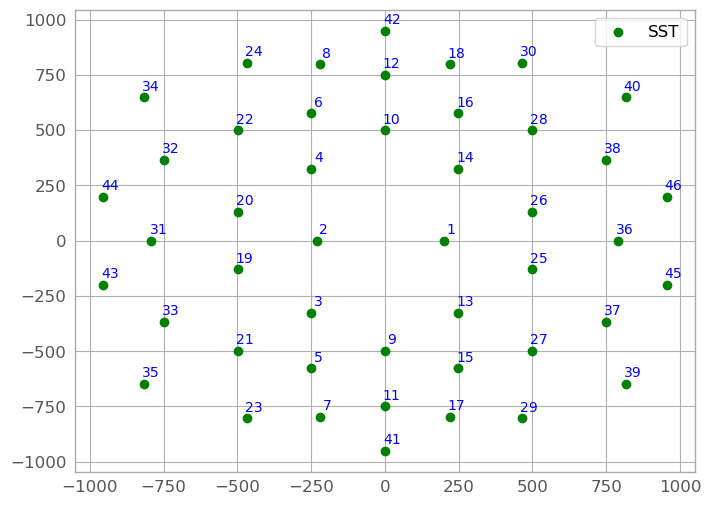

In [25]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [26]:
array.hFoV(m_cut=3) 

46it [00:06,  7.20it/s]


(62.238869377690584, 46.0)

In [27]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [28]:


sub_group_div = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}


In [29]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [30]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_group_div)

In [31]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)



<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  6  9 12 18 21 24 28 31 34 37 40 43 46]>
5.6 4.45


In [32]:
# Define the file path where you want to save the output
output_file_path = './SST_best_config_div_conv_together.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_best_config_div_conv_together.txt


## MULTIPLE DIVERGENCES

SST configuration with two subarrays

In [33]:
array_SST_2_diff_div= LoadConfig('./SST_best_config_div_conv_together.txt', frame=cta, pointing2src=True)

In [34]:
array_SST_2_diff_div.table.units = "deg"
array_SST_2_diff_div.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.85
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,931.85
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.21
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.70
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.76
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.87
7,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,8.77
8,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,578.95


## Here I am trying to find the multiplicity for each subarray division 

In [49]:
 number_of_telescopes_subarray_1

[6, 3, 3, 6, 3, 3, 4, 3, 3, 3, 3, 3, 3]

In [64]:
table_SST_conv = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_conv=[]
# Append the columns for LST so I know what to get or expect
table_SST_conv.append(table_SST['x'])
table_SST_conv.append(table_SST['y'])
table_SST_conv.append(table_SST['z'])
table_SST_conv.append(table_SST['focal'])
table_SST_conv.append(table_SST['radius'])
table_SST_conv.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 2,3,4,5,6]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Putting it tel-1 because the first column we had the index
    sub_config.append([col[tel - 1] for col in table_SST_conv])
    number_of_telescopes_config_SST_conv.append(number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config)
print(number_of_telescopes_config_SST_conv)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]
[6, 3, 3, 6, 3, 3]


In [65]:
table_SST_div = []
table_SST= array_SST_2_diff_div.table
number_of_telescopes_config_SST_div=[]
# Append the columns for LST so I know what to get or expect
table_SST_div.append(table_SST['x'])
table_SST_div.append(table_SST['y'])
table_SST_div.append(table_SST['z'])
table_SST_div.append(table_SST['focal'])
table_SST_div.append(table_SST['radius'])
table_SST_div.append(table_SST['fov'])

# Initialize sub_config and other variables
sub_config_div= []
telescopes = [7,8,9,10,11,12,13]  # Telescope indices
# Loop through the telescopes so I can write them in a file
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_div.append([col[tel - 1] for col in table_SST_div])
    number_of_telescopes_config_SST_div.append( number_of_telescopes_subarray_1[tel-1])


# Print the result for verification
print(sub_config_div)
print(number_of_telescopes_config_SST_div)

[[-7.75, 0.0, 22.5, 5.6, 4.450000000000001, 62.46242685852285], [415.67, 402.0, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [415.67, -402.0, 27.92, 5.6, 4.450000000000001, 62.46242685852285], [429.33, 0.0, 16.08, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, -402.0, 48.25, 5.6, 4.450000000000001, 62.46242685852285], [-415.67, 402.0, 15.58, 5.6, 4.450000000000001, 62.46242685852285], [-429.67, 0.0, 29.42, 5.6, 4.450000000000001, 62.46242685852285]]
[4, 3, 3, 3, 3, 3, 3]


In [66]:
print(sub_config)

[[0.0, 816.83, 21.83, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, 404.67, 16.75, 5.6, 4.450000000000001, 62.46242685852285], [-840.0, -404.67, 55.92, 5.6, 4.450000000000001, 62.46242685852285], [0.0, -816.83, 65.42, 5.6, 4.450000000000001, 62.46242685852285], [839.67, -404.67, 17.75, 5.6, 4.450000000000001, 62.46242685852285], [839.67, 404.67, 10.08, 5.6, 4.450000000000001, 62.46242685852285]]


In [67]:
# Define the file path where you want to save the output
output_file_path_3 = './best_config_SST_conv.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output


New telescope data has been written to ./best_config_SST_conv.txt


In [68]:
output_file_path_4 = './best_config_SST_div.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_div:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./best_config_SST_div.txt


In [69]:
full_array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)
array_conv = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_conv.txt", frame=cta)
array_div = LoadConfig("/Users/macbook/divtel/SST/best_config_SST_div.txt", frame=cta)

In [70]:
array_div.table.units='deg'
array_div.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-7.75,0.0,22.5,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,6.92
2,415.67,402.0,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.22
3,415.67,-402.0,27.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,579.10
4,429.33,0.0,16.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,430.57
5,-415.67,-402.0,48.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.91
6,-415.67,402.0,15.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,577.50
7,-429.67,0.0,29.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,428.54


In [71]:
array_conv.table.units='deg'
array_conv.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,816.83,21.83,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,816.88
2,-840.0,404.67,16.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.41
3,-840.0,-404.67,55.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.62
4,0.0,-816.83,65.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,817.54
5,839.67,-404.67,17.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.29
6,839.67,404.67,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,932.44


In [72]:
full_array.table.units='deg'
full_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


the barycenter for the calculations[-0.73913043  0.         29.65217391]
the barycenter for the calculations of the second divergence[-0.73913043  0.         29.65217391]


6it [00:00,  7.31it/s]
7it [00:00,  7.28it/s]
6it [00:00,  6.93it/s]


13.06239815442191


7it [00:00,  7.35it/s]


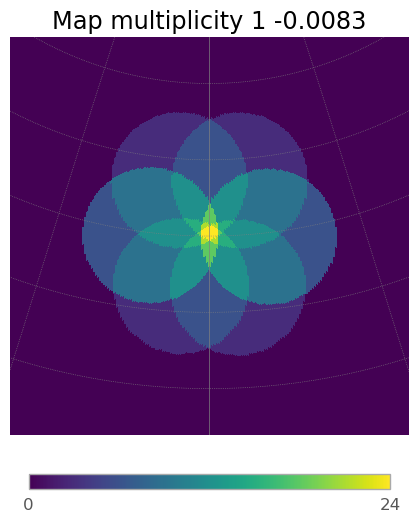

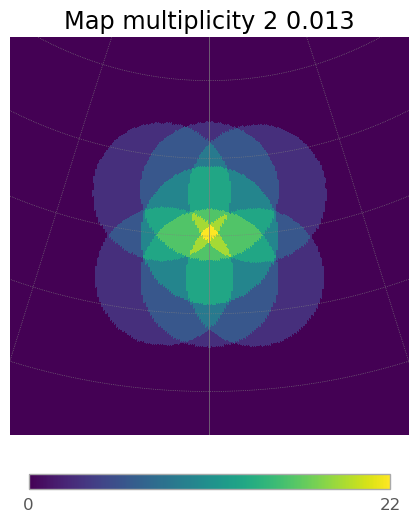

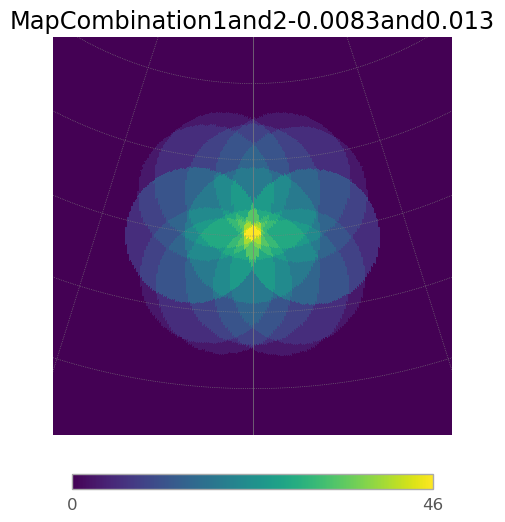

In [93]:
array_conv.divergent_pointing_2_div(complete_array=full_array,tel_group_2=array_div, div1=-0.0083, div2=0.013, az=0, alt=60)
array_conv.multiplicity_plot_2_div(array_div, subarray_mult_1=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)



46it [00:06,  7.34it/s]
46it [00:06,  7.35it/s]


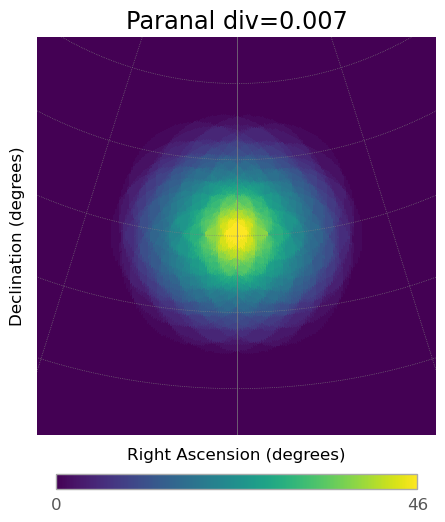

In [80]:
full_array.divergent_pointing(div=0.007, az=0, alt=60)
full_array.multiplicity_plot()

In [ ]:
## IN THE MULTIPLICITY PLOTS!!!! THERE IS A PROBLEM WITH THE POINTING THE PI!!!1

In [81]:
full_array.hFoV()

46it [00:06,  7.36it/s]


(204.17129316082276, 14.01226796839874)

In [94]:
array_conv.hFoV_for_2_arrays(array_2=array_div, subarray_mult=number_of_telescopes_config_SST_conv, subarray_mult_2=number_of_telescopes_config_SST_div)

6it [00:00,  6.95it/s]
7it [00:01,  6.76it/s]


(213.18058588363635, 13.416707677165354)

In [95]:
## here we can play around a bit with the same number as before only that we stop at 0.013
#The idea could be to do an if lets see if I am able to do it 

# CHOOSING THE DIFFERENT CONVERGENCES
## DIV lets try 0.0022, 0.0043, 0.008, 0.01135, 0.013

7it [00:00,  7.36it/s]
7it [00:00,  7.11it/s]


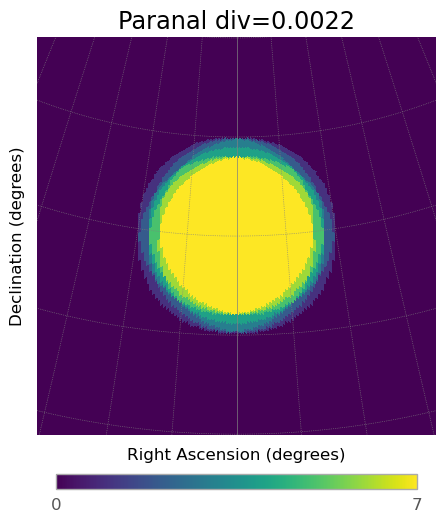

In [101]:
array_div.divergent_pointing(div=0.0022, az=0, alt=60)
array_div.multiplicity_plot()

In [105]:
array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div)

7it [00:00,  7.18it/s]


(80.33613860255637, 17.021384263793667)

In [116]:
hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]

7it [00:01,  6.90it/s]


In [117]:
hFoV_to_stop

45.977555001724234

In [121]:
conv=np.linspace(-0.0035,-0.0011, 20)
for convergence in conv:
    array_conv.divergent_pointing(div=convergence, az=0, alt=60)
    hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
    print(array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0])
    if hFoV_conv > hFoV_to_stop:
        convergence_to_stop=convergence
        print(f"stop, the {convergence}")
        break 

-6.226068608767667 rad
-6.2564375606284095 rad
-0.026747746551176732 rad
-0.057116698411919575 rad
-0.030087200256950553 rad
-6.253098106922636 rad


6it [00:00,  7.00it/s]
6it [00:00,  7.38it/s]


25.13946746671573
-6.228125761186492 rad
-6.2573507176332335 rad
-0.025834589546352316 rad
-0.05505954599309382 rad
-0.028936764342142318 rad
-6.254248542837444 rad


6it [00:00,  7.17it/s]
6it [00:00,  7.44it/s]


26.33283811850036
-6.230183376417663 rad
-6.258267591556827 rad
-0.024917715622760017 rad
-0.05300193076192361 rad
-0.02779141688155784 rad
-6.255393890298029 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.32it/s]


27.355727248601468
-6.232241437287188 rad
-6.2591882036326645 rad
-0.023997103546922194 rad
-0.05094386989239874 rad
-0.026651127120515206 rad
-6.256534180059071 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.22it/s]


28.50975601076682
-6.234299926598579 rad
-6.26011257524273 rad
-0.023072731936855995 rad
-0.048885380581006554 rad
-0.02551586452322052 rad
-6.257669442656366 rad


6it [00:00,  7.29it/s]
6it [00:00,  7.36it/s]


29.598214956900055
-6.236358827133708 rad
-6.261040727918664 rad
-0.022144579260921837 rad
-0.04682648004587753 rad
-0.024385598771175854 rad
-6.258799708408411 rad


6it [00:00,  6.34it/s]
6it [00:00,  7.30it/s]


30.581762197381888
-6.238418121653659 rad
-6.2619726833429175 rad
-0.021212623836668776 rad
-0.04476718552592773 rad
-0.02326029976159738 rad
-6.259925007417989 rad


6it [00:00,  7.18it/s]
6it [00:00,  7.30it/s]


31.919386444437187
-6.240477792899586 rad
-6.262908463349918 rad
-0.020276843829668323 rad
-0.042707514280000414 rad
-0.022139937605840654 rad
-6.261045369573745 rad


6it [00:00,  7.37it/s]
6it [00:00,  7.22it/s]


33.08652916980896
-6.242537823593583 rad
-6.263848089927247 rad
-0.01933721725233939 rad
-0.040647483586002675 rad
-0.021024482627832963 rad
-6.262160824551753 rad


6it [00:00,  7.29it/s]
6it [00:00,  7.32it/s]


34.437267380070686
-6.244598196439544 rad
-6.264791585216818 rad
-0.018393721962768783 rad
-0.038587110740042174 rad
-0.019913905362514583 rad
-6.263271401817072 rad


6it [00:00,  7.31it/s]
6it [00:00,  7.14it/s]


35.55195425261677
-6.246658894124027 rad
-6.265738971516071 rad
-0.017446335663515278 rad
-0.036526413055558926 rad
-0.01880817655429201 rad
-6.264377130625294 rad


6it [00:00,  7.19it/s]
6it [00:00,  7.16it/s]


36.81089472043352
-6.24871989931713 rad
-6.266690271279171 rad
-0.01649503590041501 rad
-0.034465407862456665 rad
-0.017707267155494755 rad
-6.2654780400240915 rad


6it [00:00,  7.14it/s]
6it [00:00,  7.10it/s]


38.09606311466312
-6.250781194673355 rad
-6.2676455071182176 rad
-0.015539800061368236 rad
-0.03240411250623154 rad
-0.016611148324843228 rad
-6.266574158854743 rad


6it [00:00,  7.37it/s]
6it [00:00,  7.36it/s]


39.25009187682847
-6.252842762832485 rad
-6.2686047018044615 rad
-0.014580605375124733 rad
-0.03034254434710082 rad
-0.015519791425925966 rad
-6.26766551575366 rad


6it [00:00,  7.22it/s]
6it [00:00,  7.24it/s]


40.758197645567286
-6.254904586420461 rad
-6.2695678782695285 rad
-0.013617428910057683 rad
-0.02828072075912491 rad
-0.014433168025683507 rad
-6.268752139153903 rad


6it [00:00,  7.38it/s]
6it [00:00,  7.30it/s]


41.93845433414549
-6.256966648050254 rad
-6.27053505960666 rad
-0.012650247572925988 rad
-0.026218659129332522 rad
-0.013351249892903816 rad
-6.269834057286682 rad


6it [00:00,  7.20it/s]
6it [00:00,  7.38it/s]


43.36787632364576
-6.259028930322744 rad
-6.271506269071953 rad
-0.011679038107633932 rad
-0.0241563768568418 rad
-0.012274008996722152 rad
-6.270911298182864 rad


6it [00:00,  6.94it/s]
6it [00:00,  7.32it/s]


44.69238660749463
-6.261091415827606 rad
-6.272481530085609 rad
-0.010703777093977074 rad
-0.022093891351981032 rad
-0.011201417505135591 rad
-6.27198388967445 rad


6it [00:00,  7.05it/s]
6it [00:00,  7.43it/s]

46.134922560201325
stop, the -0.0013526315789473679


In [123]:
convergence_to_stop

-0.0013526315789473679

In [142]:
conv=np.linspace(-0.0083,-0.0014, 100)
convergence_list=[]
divergence_list=[0.0022, 0.0043, 0.008, 0.01135, 0.013]
for divergence in divergence_list:
    for convergence in conv:
        array_div.divergent_pointing(div=divergence, az=0, alt=60)
        hFoV_to_stop=array_div.hFoV(subarray_mult=number_of_telescopes_config_SST_div,m_cut=21)[0]
        array_conv.divergent_pointing(div=convergence, az=0, alt=60)
        hFoV_conv=array_conv.hFoV(subarray_mult=number_of_telescopes_config_SST_conv,m_cut=23)[0]
        if hFoV_conv > hFoV_to_stop:
            convergence_list.append(convergence)
            print(f"stop, the {convergence}")
            break 

7it [00:00,  7.13it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.44it/s]


-6.149524832796958 rad
-6.224729635710567 rad
-0.058455671469019865 rad
-0.13366047438262862 rad
-0.0771456105339956 rad
-6.206039696645591 rad


6it [00:00,  7.52it/s]
7it [00:00,  7.40it/s]


-6.1506435445352885 rad
-6.225164028031221 rad
-0.05802127914836541 rad
-0.13254176264429773 rad
-0.07639145326026675 rad
-6.2067938539193195 rad


6it [00:00,  7.33it/s]
7it [00:00,  7.26it/s]


-6.151762587832646 rad
-6.225599337121608 rad
-0.057585970057978386 rad
-0.1314227193469404 rad
-0.0756392540672155 rad
-6.20754605311237 rad


6it [00:00,  7.30it/s]
7it [00:00,  7.42it/s]


-6.152881960048865 rad
-6.226035565727873 rad
-0.0571497414517137 rad
-0.13030334713072111 rad
-0.07488900617580763 rad
-6.208296301003779 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.33it/s]


-6.154001658538943 rad
-6.226472716606402 rad
-0.056712590573184674 rad
-0.1291836486406428 rad
-0.07414070283340335 rad
-6.209044604346182 rad


6it [00:00,  7.42it/s]
7it [00:00,  7.29it/s]


-6.155121680653073 rad
-6.226910792523865 rad
-0.056274514655720864 rad
-0.12806362652651337 rad
-0.0733943373136694 rad
-6.209790969865917 rad


6it [00:00,  6.99it/s]
7it [00:01,  5.94it/s]


-6.156242023736674 rad
-6.227349796257262 rad
-0.05583551092232408 rad
-0.12694328344291206 rad
-0.07264990291648354 rad
-6.210535404263103 rad


6it [00:00,  7.06it/s]
7it [00:01,  6.95it/s]


-6.157362685130433 rad
-6.227789730593962 rad
-0.055395576585623996 rad
-0.1258226220491525 rad
-0.07190739296784443 rad
-6.211277914211742 rad


6it [00:00,  7.14it/s]
7it [00:01,  6.88it/s]


-6.158483662170338 rad
-6.228230598331753 rad
-0.05495470884783327 rad
-0.12470164500924863 rad
-0.07116680081978144 rad
-6.212018506359804 rad


6it [00:00,  6.86it/s]
7it [00:01,  6.65it/s]


-6.159604952187707 rad
-6.228672402278882 rad
-0.054512904900704484 rad
-0.12358035499187903 rad
-0.07042811985026098 rad
-6.212757187329325 rad


6it [00:00,  7.10it/s]
7it [00:00,  7.10it/s]


-6.160726552509233 rad
-6.2291151452541005 rad
-0.05407016192548619 rad
-0.12245875467035283 rad
-0.0696913434630968 rad
-6.213493963716489 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.04it/s]


-6.161848460457016 rad
-6.229558830086711 rad
-0.05362647709287538 rad
-0.12133684672257106 rad
-0.06895646508785624 rad
-6.21422884209173 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.30it/s]


-6.1629706733485925 rad
-6.230003459616611 rad
-0.05318184756297528 rad
-0.12021463383099373 rad
-0.06822347817977237 rad
-6.214961828999813 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.34it/s]


-6.1640931884969845 rad
-6.230449036694337 rad
-0.05273627048525009 rad
-0.11909211868260217 rad
-0.06749237621964888 rad
-6.215692930959937 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.31it/s]


-6.165216003210722 rad
-6.230895564181109 rad
-0.052289742998476996 rad
-0.11796930396886385 rad
-0.06676315271377131 rad
-6.216422154465815 rad


6it [00:00,  7.37it/s]
7it [00:00,  7.15it/s]


-6.166339114793891 rad
-6.231343044948883 rad
-0.051842262230703984 rad
-0.11684619238569516 rad
-0.06603580119381425 rad
-6.2171495059857715 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.38it/s]


-6.167462520546161 rad
-6.231791481880384 rad
-0.051393825299202334 rad
-0.11572278663342495 rad
-0.06531031521675112 rad
-6.2178749919628356 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.44it/s]


-6.168586217762827 rad
-6.232240877869166 rad
-0.050944429310420425 rad
-0.11459908941675945 rad
-0.06458668836476322 rad
-6.2185986188148235 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.24it/s]


-6.169710203734843 rad
-6.232691235819647 rad
-0.05049407135993933 rad
-0.11347510344474321 rad
-0.06386491424514773 rad
-6.2193203929344385 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.54it/s]


-6.170834475748863 rad
-6.233142558647161 rad
-0.05004274853242441 rad
-0.11235083143072355 rad
-0.06314498649022715 rad
-6.220040320689359 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.19it/s]


-6.1719590310872725 rad
-6.233594849278006 rad
-0.049590457901580454 rad
-0.11122627609231328 rad
-0.062426898757258265 rad
-6.220758408422328 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.27it/s]


-6.173083867028232 rad
-6.234048110649483 rad
-0.04913719653010329 rad
-0.11010144015135337 rad
-0.06171064472834287 rad
-6.221474662451243 rad


6it [00:00,  7.20it/s]
7it [00:00,  7.35it/s]


-6.1742089808457115 rad
-6.234502345709951 rad
-0.04868296146963491 rad
-0.10897632633387477 rad
-0.06099621811033362 rad
-6.222189089069253 rad


6it [00:00,  7.33it/s]
7it [00:00,  7.16it/s]


-6.175334369809525 rad
-6.234957557418872 rad
-0.0482277497607142 rad
-0.10785093737006202 rad
-0.06028361263474702 rad
-6.22290169454484 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.52it/s]


-6.176460031185371 rad
-6.235413748746854 rad
-0.047771558432732064 rad
-0.10672527599421455 rad
-0.05957282205767145 rad
-6.223612485121915 rad


6it [00:00,  7.37it/s]
7it [00:00,  7.34it/s]


-6.177585962234877 rad
-6.235870922675705 rad
-0.04731438450388081 rad
-0.10559934494470902 rad
-0.058863840159675274 rad
-6.2243214670199105 rad


6it [00:00,  7.04it/s]
7it [00:00,  7.04it/s]


-6.178712160215624 rad
-6.236329082198477 rad
-0.04685622498110931 rad
-0.10447314696396237 rad
-0.05815666074571979 rad
-6.225028646433866 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.31it/s]


-6.179838622381195 rad
-6.2367882303195135 rad
-0.04639707686007277 rad
-0.10334668479839149 rad
-0.05745127764506641 rad
-6.22573402953452 rad


6it [00:00,  6.97it/s]
7it [00:01,  7.00it/s]


-6.1809653459812095 rad
-6.2372483700545 rad
-0.04593693712508662 rad
-0.10221996119837673 rad
-0.05674768471118652 rad
-6.226437622468399 rad


6it [00:00,  7.13it/s]
7it [00:00,  7.16it/s]


-6.182092328261364 rad
-6.23770950443051 rad
-0.04547580274907581 rad
-0.10109297891822289 rad
-0.056045875821673974 rad
-6.227139431357912 rad


6it [00:00,  7.37it/s]
7it [00:00,  7.19it/s]


-6.183219566463466 rad
-6.238171636486058 rad
-0.04501367069352824 rad
-0.09996574071612008 rad
-0.055345844878152306 rad
-6.227839462301434 rad


6it [00:00,  7.10it/s]
7it [00:00,  7.36it/s]


-6.18434705782548 rad
-6.23863476927114 rad
-0.04455053790844543 rad
-0.09883824935410557 rad
-0.05464758580618678 rad
-6.2285377213733994 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.47it/s]


-6.185474799581563 rad
-6.239098905847294 rad
-0.04408640133229236 rad
-0.0977105075980238 rad
-0.053951092555195146 rad
-6.229234214624391 rad


6it [00:00,  7.26it/s]
7it [00:00,  7.35it/s]


-6.186602788962096 rad
-6.239564049287637 rad
-0.04362125789194948 rad
-0.09658251821748998 rad
-0.053256359098356576 rad
-6.22992894808123 rad


6it [00:00,  7.20it/s]
7it [00:00,  7.35it/s]


-6.18773102319374 rad
-6.240030202676922 rad
-0.04315510450266391 rad
-0.09545428398584699 rad
-0.05256337943252376 rad
-6.2306219277470625 rad


6it [00:00,  7.09it/s]
7it [00:01,  6.91it/s]


-6.188859499499458 rad
-6.240497369111589 rad
-0.04268793806799698 rad
-0.09432580768012899 rad
-0.0518721475781323 rad
-6.231313159601454 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.22it/s]


-6.189988215098564 rad
-6.240965551699809 rad
-0.04221975547977763 rad
-0.09319709208102189 rad
-0.05118265757911411 rad
-6.232002649600473 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.26it/s]


-6.191117167206764 rad
-6.241434753561537 rad
-0.041750553618050024 rad
-0.09206813997282204 rad
-0.05049490350280594 rad
-6.232690403676781 rad


6it [00:00,  7.43it/s]
7it [00:00,  7.28it/s]


-6.1922463530361895 rad
-6.241904977828561 rad
-0.04128032935102466 rad
-0.09093895414339714 rad
-0.04980887943986234 rad
-6.233376427739724 rad


6it [00:00,  7.37it/s]
7it [00:00,  7.40it/s]


-6.1933757697954395 rad
-6.242376227644559 rad
-0.040809079535027326 rad
-0.08980953738414676 rad
-0.04912457950416593 rad
-6.23406072767542 rad


6it [00:00,  7.48it/s]
7it [00:00,  7.31it/s]


-6.194505414689623 rad
-6.242848506165139 rad
-0.04033680101444759 rad
-0.08867989248996322 rad
-0.048441997832740835 rad
-6.234743309346845 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.32it/s]


-6.195635284920398 rad
-6.243321816557897 rad
-0.03986349062168948 rad
-0.08755002225918851 rad
-0.04776112858566206 rad
-6.235424178593924 rad


6it [00:00,  7.50it/s]
7it [00:00,  7.32it/s]


-6.196765377686009 rad
-6.243796162002467 rad
-0.03938914517711911 rad
-0.08641992949357746 rad
-0.047081965945968474 rad
-6.236103341233617 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.17it/s]


-6.197895690181332 rad
-6.244271545690573 rad
-0.038913761489013154 rad
-0.0852896169982551 rad
-0.04640450411957664 rad
-6.236780803060009 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.08it/s]


-6.19902621959791 rad
-6.244747970826078 rad
-0.038437336353508655 rad
-0.08415908758167667 rad
-0.045728737335189784 rad
-6.2374565698443964 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.17it/s]


-6.200156963123998 rad
-6.2452254406250365 rad
-0.037959866554549304 rad
-0.08302834405558812 rad
-0.04505465984421253 rad
-6.238130647335374 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.28it/s]


-6.201287917944603 rad
-6.245703958315751 rad
-0.03748134886383481 rad
-0.08189738923498302 rad
-0.04438226592066297 rad
-6.238803041258923 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.48it/s]


-6.202419081241523 rad
-6.246183527138818 rad
-0.037001780040768484 rad
-0.08076622593806393 rad
-0.043711549861085164 rad
-6.2394737573185015 rad


6it [00:00,  7.27it/s]
7it [00:01,  6.96it/s]


-6.2035504501933865 rad
-6.246664150347183 rad
-0.03652115683240309 rad
-0.07963485698619976 rad
-0.043042505984462576 rad
-6.240142801195123 rad


6it [00:00,  7.11it/s]
7it [00:01,  6.76it/s]


-6.2046820219757 rad
-6.247145831206195 rad
-0.03603947597339108 rad
-0.07850328520388583 rad
-0.042375128632131 rad
-6.240810178547456 rad


6it [00:00,  6.39it/s]
7it [00:01,  6.94it/s]


-6.205813793760884 rad
-6.247628572993658 rad
-0.03555673418592864 rad
-0.07737151341870208 rad
-0.041709412167691085 rad
-6.241475895011895 rad


6it [00:00,  6.78it/s]
7it [00:01,  6.15it/s]


-6.206945762718314 rad
-6.248112378999881 rad
-0.03507292817970553 rad
-0.07623954446127135 rad
-0.04104535097692441 rad
-6.242139956202662 rad


6it [00:00,  7.03it/s]
7it [00:01,  6.94it/s]


-6.208077926014367 rad
-6.2485972525277385 rad
-0.03458805465184778 rad
-0.07510738116521898 rad
-0.04038293946770333 rad
-6.242802367711883 rad


6it [00:00,  7.00it/s]
7it [00:00,  7.17it/s]


-6.2092102808124565 rad
-6.249083196892718 rad
-0.03410211028686838 rad
-0.07397502636712971 rad
-0.03972217206990836 rad
-6.243463135109678 rad


6it [00:00,  7.29it/s]
7it [00:00,  7.34it/s]


-6.210342824273079 rad
-6.249570215422976 rad
-0.033615091756610926 rad
-0.0728424829065073 rad
-0.03906304323534071 rad
-6.244122263944245 rad


6it [00:00,  7.44it/s]
7it [00:00,  7.46it/s]


-6.211475553553854 rad
-6.250058311459391 rad
-0.03312699572019495 rad
-0.07170975362573184 rad
-0.03840554743763658 rad
-6.24477975974195 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.18it/s]


-6.212608465809568 rad
-6.250547488355622 rad
-0.03263781882396399 rad
-0.07057684137001852 rad
-0.03774967917218186 rad
-6.245435628007405 rad


6it [00:00,  7.45it/s]
7it [00:00,  7.19it/s]


-6.213741558192211 rad
-6.251037749478157 rad
-0.032147557701429186 rad
-0.06944374898737493 rad
-0.03709543295602735 rad
-6.246089874223559 rad


6it [00:00,  7.30it/s]
7it [00:00,  7.43it/s]


-6.214874827851027 rad
-6.251529098206371 rad
-0.03165620897321508 rad
-0.06831047932855938 rad
-0.03644280332780303 rad
-6.246742503851783 rad


6it [00:00,  7.30it/s]
7it [00:00,  7.20it/s]


-6.216008271932547 rad
-6.252021537932581 rad
-0.031163769247005035 rad
-0.06717703524703911 rad
-0.035791784847632346 rad
-6.247393522331954 rad


6it [00:00,  7.19it/s]
7it [00:00,  7.32it/s]


-6.21714188758064 rad
-6.252515072062101 rad
-0.030670235117485234 rad
-0.06604341959894588 rad
-0.03514237209705007 rad
-6.248042935082536 rad


6it [00:00,  7.46it/s]
7it [00:00,  7.47it/s]


-6.218275671936549 rad
-6.253009704013296 rad
-0.030175603166290088 rad
-0.0649096352430365 rad
-0.03449455967891524 rad
-6.248690747500671 rad


6it [00:00,  7.13it/s]
7it [00:00,  7.38it/s]


-6.219409622138938 rad
-6.25350543721764 rad
-0.029679869961945382 rad
-0.0637756850406479 rad
-0.033848342217328575 rad
-6.249336964962257 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.41it/s]


-6.220543735323931 rad
-6.254002275119773 rad
-0.029183032059813208 rad
-0.06264157185565589 rad
-0.033203714357546765 rad
-6.2499815928220395 rad


6it [00:00,  6.96it/s]
7it [00:00,  7.01it/s]


-6.221678008625155 rad
-6.254500221177549 rad
-0.028685086002036897 rad
-0.0615072985544316 rad
-0.03256067076590119 rad
-6.250624636413685 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.18it/s]


-6.222812439173788 rad
-6.254999278862105 rad
-0.028186028317481515 rad
-0.06037286800579844 rad
-0.031919206129711775 rad
-6.2512661010498745 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.34it/s]


-6.223947024098596 rad
-6.255499451657906 rad
-0.02768585552168057 rad
-0.05923828308099033 rad
-0.031279315157204834 rad
-6.251905992022381 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.14it/s]


-6.225081760525978 rad
-6.256000743062808 rad
-0.027184564116777832 rad
-0.058103546653608174 rad
-0.030640992577430026 rad
-6.252544314602156 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.12it/s]


-6.22621664558001 rad
-6.256503156588117 rad
-0.026682150591468723 rad
-0.05696866159957592 rad
-0.030004233140175973 rad
-6.253181074039411 rad


6it [00:00,  7.10it/s]
7it [00:00,  7.34it/s]


-6.227351676382487 rad
-6.2570066957586405 rad
-0.026178611420945685 rad
-0.0558336307970988 rad
-0.029369031615889885 rad
-6.253816275563697 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.34it/s]


-6.228486850052969 rad
-6.257511364112746 rad
-0.025673943066839566 rad
-0.05469845712661803 rad
-0.02873538279559318 rad
-6.254449924383993 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.38it/s]


-6.229622163708816 rad
-6.258017165202426 rad
-0.025168141977160552 rad
-0.05356314347076996 rad
-0.02810328149079977 rad
-6.255082025688786 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.26it/s]


-6.2307576144652455 rad
-6.258524102593345 rad
-0.02466120458624177 rad
-0.052427692714340335 rad
-0.0274727225334348 rad
-6.255712584646151 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.38it/s]


-6.231893199435364 rad
-6.259032179864905 rad
-0.02415312731468111 rad
-0.05129210774422299 rad
-0.026843700775750712 rad
-6.2563416064038355 rad


6it [00:00,  6.77it/s]
7it [00:01,  6.83it/s]


-6.233028915730213 rad
-6.259541400610305 rad
-0.023643906569280837 rad
-0.05015639144937323 rad
-0.026216211090247743 rad
-6.256969096089339 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.28it/s]


-6.234164760458819 rad
-6.260051768436595 rad
-0.023133538742990734 rad
-0.04902054672076739 rad
-0.025590248369591784 rad
-6.2575950588099944 rad


6it [00:00,  7.30it/s]
7it [00:00,  7.43it/s]


-6.2353007307282295 rad
-6.260563286964738 rad
-0.022622020214848604 rad
-0.047884576451356686 rad
-0.02496580752653399 rad
-6.258219499653052 rad


6it [00:00,  7.16it/s]
7it [00:00,  7.38it/s]


-6.236436823643562 rad
-6.261075959829666 rad
-0.022109347349920316 rad
-0.046748483536024565 rad
-0.024342883493827294 rad
-6.258842423685759 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.20it/s]


-6.237573036308044 rad
-6.261589790680345 rad
-0.02159551649924163 rad
-0.04561227087154229 rad
-0.023721471224149582 rad
-6.259463835955437 rad


6it [00:00,  7.42it/s]
7it [00:00,  7.29it/s]


-6.238709365823061 rad
-6.262104783179829 rad
-0.021080523999756906 rad
-0.04447594135652544 rad
-0.023101565690020198 rad
-6.2600837414895665 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.33it/s]


-6.239845809288198 rad
-6.262620941005325 rad
-0.02056436617426094 rad
-0.04333949789138858 rad
-0.022483161883720904 rad
-6.260702145295865 rad


6it [00:00,  7.32it/s]
7it [00:00,  7.42it/s]


-6.240982363801283 rad
-6.263138267848249 rad
-0.020047039331337224 rad
-0.04220294337830355 rad
-0.021866254817216824 rad
-6.261319052362369 rad


6it [00:00,  6.99it/s]
7it [00:00,  7.39it/s]


-6.242119026458434 rad
-6.263656767414289 rad
-0.01952853976529756 rad
-0.04106628072115237 rad
-0.02125083952207385 rad
-6.261934467657513 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.44it/s]


-6.243255794354102 rad
-6.264176443423463 rad
-0.019008863756122985 rad
-0.03992951282548418 rad
-0.020636911049383144 rad
-6.262548396130203 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.43it/s]


-6.244392664581113 rad
-6.2646972996101855 rad
-0.018488007569400722 rad
-0.03879264259847259 rad
-0.020024464469678538 rad
-6.263160842709908 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.24it/s]


-6.245529634230717 rad
-6.265219339723321 rad
-0.017965967456265552 rad
-0.037655672948868624 rad
-0.01941349487285926 rad
-6.263771812306727 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.33it/s]


-6.246666700392629 rad
-6.265742567526251 rad
-0.017442739653334982 rad
-0.036518606786957175 rad
-0.018803997368110448 rad
-6.264381309811476 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.34it/s]


-6.247803860155073 rad
-6.266266986796936 rad
-0.016918320382651064 rad
-0.03538144702451351 rad
-0.01819596708382587 rad
-6.26498934009576 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.47it/s]


-6.248941110604829 rad
-6.266792601327971 rad
-0.016392705851615563 rad
-0.03424419657475708 rad
-0.01758939916752711 rad
-6.26559590801206 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.27it/s]


-6.250078448827278 rad
-6.267319414926655 rad
-0.015865892252930447 rad
-0.03310685835230842 rad
-0.016984288785788948 rad
-6.266201018393797 rad


6it [00:00,  6.08it/s]
7it [00:00,  7.23it/s]


-6.251215871906443 rad
-6.267847431415053 rad
-0.015337875764533049 rad
-0.031969435273143 rad
-0.01638063112415855 rad
-6.266804676055427 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.19it/s]


-6.252353376925038 rad
-6.2683766546300514 rad
-0.014808652549535228 rad
-0.030831930254547668 rad
-0.015778421387079522 rad
-6.267406885792507 rad


6it [00:00,  7.02it/s]
7it [00:00,  7.17it/s]


-6.253490960964511 rad
-6.268907088423427 rad
-0.014278218756158978 rad
-0.029694346215075385 rad
-0.015177654797814188 rad
-6.2680076523817725 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.47it/s]


-6.254628621105086 rad
-6.269438736661911 rad
-0.013746570517675138 rad
-0.028556686074499904 rad
-0.01457832659836722 rad
-6.268606980581219 rad


6it [00:00,  6.87it/s]
7it [00:00,  7.08it/s]


-6.2557663544258135 rad
-6.269971603227249 rad
-0.013213703952337674 rad
-0.027418952753772707 rad
-0.013980432049407465 rad
-6.269204875130178 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.34it/s]


-6.256904158004611 rad
-6.270505692016263 rad
-0.012679615163322833 rad
-0.026281149174975038 rad
-0.013383966430192906 rad
-6.269801340749393 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.47it/s]


-6.258042028918311 rad
-6.271041006940925 rad
-0.012144300238662087 rad
-0.025143278261275714 rad
-0.012788925038492494 rad
-6.270396382141094 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.36it/s]


-6.259179964242701 rad
-6.271577551928406 rad
-0.011607755251180407 rad
-0.024005342936884944 rad
-0.012195303190513318 rad
-6.270990003989073 rad


6it [00:00,  7.45it/s]
7it [00:00,  7.30it/s]


-6.260317961052577 rad
-6.272115330921155 rad
-0.01106997625843098 rad
-0.022867346127009025 rad
-0.01160309622082023 rad
-6.271582210958766 rad


6it [00:00,  7.49it/s]
7it [00:00,  7.37it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.38it/s]
7it [00:01,  6.96it/s]


-6.149524832796958 rad
-6.224729635710567 rad
-0.058455671469019865 rad
-0.13366047438262862 rad
-0.0771456105339956 rad
-6.206039696645591 rad


6it [00:00,  7.32it/s]
7it [00:00,  7.00it/s]


-6.1506435445352885 rad
-6.225164028031221 rad
-0.05802127914836541 rad
-0.13254176264429773 rad
-0.07639145326026675 rad
-6.2067938539193195 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.43it/s]


-6.151762587832646 rad
-6.225599337121608 rad
-0.057585970057978386 rad
-0.1314227193469404 rad
-0.0756392540672155 rad
-6.20754605311237 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.36it/s]


-6.152881960048865 rad
-6.226035565727873 rad
-0.0571497414517137 rad
-0.13030334713072111 rad
-0.07488900617580763 rad
-6.208296301003779 rad


6it [00:00,  7.41it/s]
7it [00:00,  7.33it/s]


-6.154001658538943 rad
-6.226472716606402 rad
-0.056712590573184674 rad
-0.1291836486406428 rad
-0.07414070283340335 rad
-6.209044604346182 rad


6it [00:00,  7.37it/s]
7it [00:00,  7.35it/s]


-6.155121680653073 rad
-6.226910792523865 rad
-0.056274514655720864 rad
-0.12806362652651337 rad
-0.0733943373136694 rad
-6.209790969865917 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.18it/s]


-6.156242023736674 rad
-6.227349796257262 rad
-0.05583551092232408 rad
-0.12694328344291206 rad
-0.07264990291648354 rad
-6.210535404263103 rad


6it [00:00,  7.07it/s]
7it [00:00,  7.35it/s]


-6.157362685130433 rad
-6.227789730593962 rad
-0.055395576585623996 rad
-0.1258226220491525 rad
-0.07190739296784443 rad
-6.211277914211742 rad


6it [00:00,  7.29it/s]
7it [00:00,  7.40it/s]


-6.158483662170338 rad
-6.228230598331753 rad
-0.05495470884783327 rad
-0.12470164500924863 rad
-0.07116680081978144 rad
-6.212018506359804 rad


6it [00:00,  7.42it/s]
7it [00:00,  7.35it/s]


-6.159604952187707 rad
-6.228672402278882 rad
-0.054512904900704484 rad
-0.12358035499187903 rad
-0.07042811985026098 rad
-6.212757187329325 rad


6it [00:00,  7.17it/s]
7it [00:00,  7.01it/s]


-6.160726552509233 rad
-6.2291151452541005 rad
-0.05407016192548619 rad
-0.12245875467035283 rad
-0.0696913434630968 rad
-6.213493963716489 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.30it/s]


-6.161848460457016 rad
-6.229558830086711 rad
-0.05362647709287538 rad
-0.12133684672257106 rad
-0.06895646508785624 rad
-6.21422884209173 rad


6it [00:00,  7.15it/s]
7it [00:00,  7.44it/s]


-6.1629706733485925 rad
-6.230003459616611 rad
-0.05318184756297528 rad
-0.12021463383099373 rad
-0.06822347817977237 rad
-6.214961828999813 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.40it/s]


-6.1640931884969845 rad
-6.230449036694337 rad
-0.05273627048525009 rad
-0.11909211868260217 rad
-0.06749237621964888 rad
-6.215692930959937 rad


6it [00:00,  7.42it/s]
7it [00:00,  7.46it/s]


-6.165216003210722 rad
-6.230895564181109 rad
-0.052289742998476996 rad
-0.11796930396886385 rad
-0.06676315271377131 rad
-6.216422154465815 rad


6it [00:00,  7.32it/s]
7it [00:00,  7.46it/s]


-6.166339114793891 rad
-6.231343044948883 rad
-0.051842262230703984 rad
-0.11684619238569516 rad
-0.06603580119381425 rad
-6.2171495059857715 rad


6it [00:00,  7.42it/s]
7it [00:00,  7.41it/s]


-6.167462520546161 rad
-6.231791481880384 rad
-0.051393825299202334 rad
-0.11572278663342495 rad
-0.06531031521675112 rad
-6.2178749919628356 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.35it/s]


-6.168586217762827 rad
-6.232240877869166 rad
-0.050944429310420425 rad
-0.11459908941675945 rad
-0.06458668836476322 rad
-6.2185986188148235 rad


6it [00:00,  7.32it/s]
7it [00:00,  7.03it/s]


-6.169710203734843 rad
-6.232691235819647 rad
-0.05049407135993933 rad
-0.11347510344474321 rad
-0.06386491424514773 rad
-6.2193203929344385 rad


6it [00:00,  7.45it/s]
7it [00:00,  7.18it/s]


-6.170834475748863 rad
-6.233142558647161 rad
-0.05004274853242441 rad
-0.11235083143072355 rad
-0.06314498649022715 rad
-6.220040320689359 rad


6it [00:00,  7.47it/s]
7it [00:00,  7.42it/s]


-6.1719590310872725 rad
-6.233594849278006 rad
-0.049590457901580454 rad
-0.11122627609231328 rad
-0.062426898757258265 rad
-6.220758408422328 rad


6it [00:00,  7.37it/s]
7it [00:01,  6.79it/s]


-6.173083867028232 rad
-6.234048110649483 rad
-0.04913719653010329 rad
-0.11010144015135337 rad
-0.06171064472834287 rad
-6.221474662451243 rad


6it [00:00,  6.85it/s]
7it [00:00,  7.28it/s]


-6.1742089808457115 rad
-6.234502345709951 rad
-0.04868296146963491 rad
-0.10897632633387477 rad
-0.06099621811033362 rad
-6.222189089069253 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.07it/s]


-6.175334369809525 rad
-6.234957557418872 rad
-0.0482277497607142 rad
-0.10785093737006202 rad
-0.06028361263474702 rad
-6.22290169454484 rad


6it [00:00,  7.20it/s]
7it [00:00,  7.15it/s]


-6.176460031185371 rad
-6.235413748746854 rad
-0.047771558432732064 rad
-0.10672527599421455 rad
-0.05957282205767145 rad
-6.223612485121915 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.14it/s]


-6.177585962234877 rad
-6.235870922675705 rad
-0.04731438450388081 rad
-0.10559934494470902 rad
-0.058863840159675274 rad
-6.2243214670199105 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.03it/s]


-6.178712160215624 rad
-6.236329082198477 rad
-0.04685622498110931 rad
-0.10447314696396237 rad
-0.05815666074571979 rad
-6.225028646433866 rad


6it [00:00,  7.15it/s]
7it [00:00,  7.19it/s]


-6.179838622381195 rad
-6.2367882303195135 rad
-0.04639707686007277 rad
-0.10334668479839149 rad
-0.05745127764506641 rad
-6.22573402953452 rad


6it [00:00,  6.94it/s]
7it [00:00,  7.17it/s]


-6.1809653459812095 rad
-6.2372483700545 rad
-0.04593693712508662 rad
-0.10221996119837673 rad
-0.05674768471118652 rad
-6.226437622468399 rad


6it [00:00,  7.01it/s]
7it [00:00,  7.21it/s]


-6.182092328261364 rad
-6.23770950443051 rad
-0.04547580274907581 rad
-0.10109297891822289 rad
-0.056045875821673974 rad
-6.227139431357912 rad


6it [00:00,  7.04it/s]
7it [00:00,  7.24it/s]


-6.183219566463466 rad
-6.238171636486058 rad
-0.04501367069352824 rad
-0.09996574071612008 rad
-0.055345844878152306 rad
-6.227839462301434 rad


6it [00:00,  7.13it/s]
7it [00:00,  7.42it/s]


-6.18434705782548 rad
-6.23863476927114 rad
-0.04455053790844543 rad
-0.09883824935410557 rad
-0.05464758580618678 rad
-6.2285377213733994 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.14it/s]


-6.185474799581563 rad
-6.239098905847294 rad
-0.04408640133229236 rad
-0.0977105075980238 rad
-0.053951092555195146 rad
-6.229234214624391 rad


6it [00:00,  6.91it/s]
7it [00:00,  7.06it/s]


-6.186602788962096 rad
-6.239564049287637 rad
-0.04362125789194948 rad
-0.09658251821748998 rad
-0.053256359098356576 rad
-6.22992894808123 rad


6it [00:00,  7.17it/s]
7it [00:00,  7.25it/s]


-6.18773102319374 rad
-6.240030202676922 rad
-0.04315510450266391 rad
-0.09545428398584699 rad
-0.05256337943252376 rad
-6.2306219277470625 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.11it/s]


-6.188859499499458 rad
-6.240497369111589 rad
-0.04268793806799698 rad
-0.09432580768012899 rad
-0.0518721475781323 rad
-6.231313159601454 rad


6it [00:00,  7.48it/s]
7it [00:00,  7.17it/s]


-6.189988215098564 rad
-6.240965551699809 rad
-0.04221975547977763 rad
-0.09319709208102189 rad
-0.05118265757911411 rad
-6.232002649600473 rad


6it [00:00,  7.26it/s]
7it [00:00,  7.39it/s]


-6.191117167206764 rad
-6.241434753561537 rad
-0.041750553618050024 rad
-0.09206813997282204 rad
-0.05049490350280594 rad
-6.232690403676781 rad


6it [00:00,  6.85it/s]
7it [00:01,  6.52it/s]


-6.1922463530361895 rad
-6.241904977828561 rad
-0.04128032935102466 rad
-0.09093895414339714 rad
-0.04980887943986234 rad
-6.233376427739724 rad


6it [00:00,  6.36it/s]
7it [00:00,  7.15it/s]


-6.1933757697954395 rad
-6.242376227644559 rad
-0.040809079535027326 rad
-0.08980953738414676 rad
-0.04912457950416593 rad
-6.23406072767542 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.19it/s]


-6.194505414689623 rad
-6.242848506165139 rad
-0.04033680101444759 rad
-0.08867989248996322 rad
-0.048441997832740835 rad
-6.234743309346845 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.53it/s]


-6.195635284920398 rad
-6.243321816557897 rad
-0.03986349062168948 rad
-0.08755002225918851 rad
-0.04776112858566206 rad
-6.235424178593924 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.36it/s]


-6.196765377686009 rad
-6.243796162002467 rad
-0.03938914517711911 rad
-0.08641992949357746 rad
-0.047081965945968474 rad
-6.236103341233617 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.56it/s]


-6.197895690181332 rad
-6.244271545690573 rad
-0.038913761489013154 rad
-0.0852896169982551 rad
-0.04640450411957664 rad
-6.236780803060009 rad


6it [00:00,  7.31it/s]
7it [00:01,  5.35it/s]


-6.19902621959791 rad
-6.244747970826078 rad
-0.038437336353508655 rad
-0.08415908758167667 rad
-0.045728737335189784 rad
-6.2374565698443964 rad


6it [00:00,  7.00it/s]
7it [00:01,  6.83it/s]


-6.200156963123998 rad
-6.2452254406250365 rad
-0.037959866554549304 rad
-0.08302834405558812 rad
-0.04505465984421253 rad
-6.238130647335374 rad


6it [00:00,  7.15it/s]
7it [00:01,  6.95it/s]


-6.201287917944603 rad
-6.245703958315751 rad
-0.03748134886383481 rad
-0.08189738923498302 rad
-0.04438226592066297 rad
-6.238803041258923 rad


6it [00:00,  6.78it/s]
7it [00:00,  7.20it/s]


-6.202419081241523 rad
-6.246183527138818 rad
-0.037001780040768484 rad
-0.08076622593806393 rad
-0.043711549861085164 rad
-6.2394737573185015 rad


6it [00:00,  6.24it/s]
7it [00:01,  7.00it/s]


-6.2035504501933865 rad
-6.246664150347183 rad
-0.03652115683240309 rad
-0.07963485698619976 rad
-0.043042505984462576 rad
-6.240142801195123 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.10it/s]


-6.2046820219757 rad
-6.247145831206195 rad
-0.03603947597339108 rad
-0.07850328520388583 rad
-0.042375128632131 rad
-6.240810178547456 rad


6it [00:00,  6.62it/s]
7it [00:00,  7.02it/s]


-6.205813793760884 rad
-6.247628572993658 rad
-0.03555673418592864 rad
-0.07737151341870208 rad
-0.041709412167691085 rad
-6.241475895011895 rad


6it [00:00,  6.84it/s]
7it [00:00,  7.25it/s]


-6.206945762718314 rad
-6.248112378999881 rad
-0.03507292817970553 rad
-0.07623954446127135 rad
-0.04104535097692441 rad
-6.242139956202662 rad


6it [00:00,  7.19it/s]
7it [00:00,  7.18it/s]


-6.208077926014367 rad
-6.2485972525277385 rad
-0.03458805465184778 rad
-0.07510738116521898 rad
-0.04038293946770333 rad
-6.242802367711883 rad


6it [00:00,  7.16it/s]
7it [00:00,  7.33it/s]


-6.2092102808124565 rad
-6.249083196892718 rad
-0.03410211028686838 rad
-0.07397502636712971 rad
-0.03972217206990836 rad
-6.243463135109678 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.16it/s]


-6.210342824273079 rad
-6.249570215422976 rad
-0.033615091756610926 rad
-0.0728424829065073 rad
-0.03906304323534071 rad
-6.244122263944245 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.43it/s]


-6.211475553553854 rad
-6.250058311459391 rad
-0.03312699572019495 rad
-0.07170975362573184 rad
-0.03840554743763658 rad
-6.24477975974195 rad


6it [00:00,  7.54it/s]
7it [00:00,  7.07it/s]


-6.212608465809568 rad
-6.250547488355622 rad
-0.03263781882396399 rad
-0.07057684137001852 rad
-0.03774967917218186 rad
-6.245435628007405 rad


6it [00:00,  7.43it/s]
7it [00:00,  7.17it/s]


-6.213741558192211 rad
-6.251037749478157 rad
-0.032147557701429186 rad
-0.06944374898737493 rad
-0.03709543295602735 rad
-6.246089874223559 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.02it/s]


-6.214874827851027 rad
-6.251529098206371 rad
-0.03165620897321508 rad
-0.06831047932855938 rad
-0.03644280332780303 rad
-6.246742503851783 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.20it/s]


-6.216008271932547 rad
-6.252021537932581 rad
-0.031163769247005035 rad
-0.06717703524703911 rad
-0.035791784847632346 rad
-6.247393522331954 rad


6it [00:00,  7.32it/s]
7it [00:00,  7.01it/s]


-6.21714188758064 rad
-6.252515072062101 rad
-0.030670235117485234 rad
-0.06604341959894588 rad
-0.03514237209705007 rad
-6.248042935082536 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.41it/s]


-6.218275671936549 rad
-6.253009704013296 rad
-0.030175603166290088 rad
-0.0649096352430365 rad
-0.03449455967891524 rad
-6.248690747500671 rad


6it [00:00,  7.43it/s]
7it [00:00,  7.38it/s]


-6.219409622138938 rad
-6.25350543721764 rad
-0.029679869961945382 rad
-0.0637756850406479 rad
-0.033848342217328575 rad
-6.249336964962257 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.31it/s]


-6.220543735323931 rad
-6.254002275119773 rad
-0.029183032059813208 rad
-0.06264157185565589 rad
-0.033203714357546765 rad
-6.2499815928220395 rad


6it [00:00,  7.16it/s]
7it [00:01,  6.85it/s]


-6.221678008625155 rad
-6.254500221177549 rad
-0.028685086002036897 rad
-0.0615072985544316 rad
-0.03256067076590119 rad
-6.250624636413685 rad


6it [00:00,  6.34it/s]
7it [00:00,  7.00it/s]


-6.222812439173788 rad
-6.254999278862105 rad
-0.028186028317481515 rad
-0.06037286800579844 rad
-0.031919206129711775 rad
-6.2512661010498745 rad


6it [00:00,  6.82it/s]
7it [00:01,  6.82it/s]


-6.223947024098596 rad
-6.255499451657906 rad
-0.02768585552168057 rad
-0.05923828308099033 rad
-0.031279315157204834 rad
-6.251905992022381 rad


6it [00:00,  7.17it/s]
7it [00:00,  7.12it/s]


-6.225081760525978 rad
-6.256000743062808 rad
-0.027184564116777832 rad
-0.058103546653608174 rad
-0.030640992577430026 rad
-6.252544314602156 rad


6it [00:00,  7.10it/s]
7it [00:01,  6.89it/s]


-6.22621664558001 rad
-6.256503156588117 rad
-0.026682150591468723 rad
-0.05696866159957592 rad
-0.030004233140175973 rad
-6.253181074039411 rad


6it [00:00,  7.19it/s]
7it [00:00,  7.33it/s]


-6.227351676382487 rad
-6.2570066957586405 rad
-0.026178611420945685 rad
-0.0558336307970988 rad
-0.029369031615889885 rad
-6.253816275563697 rad


6it [00:00,  7.04it/s]
7it [00:01,  6.97it/s]


-6.228486850052969 rad
-6.257511364112746 rad
-0.025673943066839566 rad
-0.05469845712661803 rad
-0.02873538279559318 rad
-6.254449924383993 rad


6it [00:00,  6.95it/s]
7it [00:00,  7.13it/s]


-6.229622163708816 rad
-6.258017165202426 rad
-0.025168141977160552 rad
-0.05356314347076996 rad
-0.02810328149079977 rad
-6.255082025688786 rad


6it [00:00,  7.01it/s]
7it [00:00,  7.25it/s]


-6.2307576144652455 rad
-6.258524102593345 rad
-0.02466120458624177 rad
-0.052427692714340335 rad
-0.0274727225334348 rad
-6.255712584646151 rad


6it [00:00,  6.78it/s]
7it [00:01,  6.90it/s]


-6.231893199435364 rad
-6.259032179864905 rad
-0.02415312731468111 rad
-0.05129210774422299 rad
-0.026843700775750712 rad
-6.2563416064038355 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.04it/s]


-6.233028915730213 rad
-6.259541400610305 rad
-0.023643906569280837 rad
-0.05015639144937323 rad
-0.026216211090247743 rad
-6.256969096089339 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.23it/s]


-6.234164760458819 rad
-6.260051768436595 rad
-0.023133538742990734 rad
-0.04902054672076739 rad
-0.025590248369591784 rad
-6.2575950588099944 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.47it/s]


-6.2353007307282295 rad
-6.260563286964738 rad
-0.022622020214848604 rad
-0.047884576451356686 rad
-0.02496580752653399 rad
-6.258219499653052 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.31it/s]


-6.236436823643562 rad
-6.261075959829666 rad
-0.022109347349920316 rad
-0.046748483536024565 rad
-0.024342883493827294 rad
-6.258842423685759 rad


6it [00:00,  7.20it/s]
7it [00:00,  7.26it/s]


-6.237573036308044 rad
-6.261589790680345 rad
-0.02159551649924163 rad
-0.04561227087154229 rad
-0.023721471224149582 rad
-6.259463835955437 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.29it/s]


-6.238709365823061 rad
-6.262104783179829 rad
-0.021080523999756906 rad
-0.04447594135652544 rad
-0.023101565690020198 rad
-6.2600837414895665 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.11it/s]


-6.239845809288198 rad
-6.262620941005325 rad
-0.02056436617426094 rad
-0.04333949789138858 rad
-0.022483161883720904 rad
-6.260702145295865 rad


6it [00:00,  7.18it/s]


stop, the -0.0026545454545454546


7it [00:00,  7.54it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.46it/s]
7it [00:00,  7.41it/s]


-6.149524832796958 rad
-6.224729635710567 rad
-0.058455671469019865 rad
-0.13366047438262862 rad
-0.0771456105339956 rad
-6.206039696645591 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.33it/s]


-6.1506435445352885 rad
-6.225164028031221 rad
-0.05802127914836541 rad
-0.13254176264429773 rad
-0.07639145326026675 rad
-6.2067938539193195 rad


6it [00:00,  7.07it/s]
7it [00:00,  7.24it/s]


-6.151762587832646 rad
-6.225599337121608 rad
-0.057585970057978386 rad
-0.1314227193469404 rad
-0.0756392540672155 rad
-6.20754605311237 rad


6it [00:00,  7.35it/s]
7it [00:00,  7.38it/s]


-6.152881960048865 rad
-6.226035565727873 rad
-0.0571497414517137 rad
-0.13030334713072111 rad
-0.07488900617580763 rad
-6.208296301003779 rad


6it [00:00,  7.12it/s]
7it [00:00,  7.27it/s]


-6.154001658538943 rad
-6.226472716606402 rad
-0.056712590573184674 rad
-0.1291836486406428 rad
-0.07414070283340335 rad
-6.209044604346182 rad


6it [00:00,  6.77it/s]
7it [00:00,  7.18it/s]


-6.155121680653073 rad
-6.226910792523865 rad
-0.056274514655720864 rad
-0.12806362652651337 rad
-0.0733943373136694 rad
-6.209790969865917 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.27it/s]


-6.156242023736674 rad
-6.227349796257262 rad
-0.05583551092232408 rad
-0.12694328344291206 rad
-0.07264990291648354 rad
-6.210535404263103 rad


6it [00:00,  7.21it/s]
7it [00:00,  7.25it/s]


-6.157362685130433 rad
-6.227789730593962 rad
-0.055395576585623996 rad
-0.1258226220491525 rad
-0.07190739296784443 rad
-6.211277914211742 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.37it/s]


-6.158483662170338 rad
-6.228230598331753 rad
-0.05495470884783327 rad
-0.12470164500924863 rad
-0.07116680081978144 rad
-6.212018506359804 rad


6it [00:00,  7.11it/s]
7it [00:00,  7.30it/s]


-6.159604952187707 rad
-6.228672402278882 rad
-0.054512904900704484 rad
-0.12358035499187903 rad
-0.07042811985026098 rad
-6.212757187329325 rad


6it [00:00,  7.10it/s]
7it [00:01,  5.97it/s]


-6.160726552509233 rad
-6.2291151452541005 rad
-0.05407016192548619 rad
-0.12245875467035283 rad
-0.0696913434630968 rad
-6.213493963716489 rad


6it [00:00,  6.83it/s]
7it [00:00,  7.17it/s]


-6.161848460457016 rad
-6.229558830086711 rad
-0.05362647709287538 rad
-0.12133684672257106 rad
-0.06895646508785624 rad
-6.21422884209173 rad


6it [00:00,  7.11it/s]
7it [00:00,  7.15it/s]


-6.1629706733485925 rad
-6.230003459616611 rad
-0.05318184756297528 rad
-0.12021463383099373 rad
-0.06822347817977237 rad
-6.214961828999813 rad


6it [00:00,  6.98it/s]
7it [00:00,  7.06it/s]


-6.1640931884969845 rad
-6.230449036694337 rad
-0.05273627048525009 rad
-0.11909211868260217 rad
-0.06749237621964888 rad
-6.215692930959937 rad


6it [00:00,  7.05it/s]
7it [00:00,  7.08it/s]


-6.165216003210722 rad
-6.230895564181109 rad
-0.052289742998476996 rad
-0.11796930396886385 rad
-0.06676315271377131 rad
-6.216422154465815 rad


6it [00:00,  6.98it/s]
7it [00:00,  7.22it/s]


-6.166339114793891 rad
-6.231343044948883 rad
-0.051842262230703984 rad
-0.11684619238569516 rad
-0.06603580119381425 rad
-6.2171495059857715 rad


6it [00:00,  7.04it/s]
7it [00:00,  7.06it/s]


-6.167462520546161 rad
-6.231791481880384 rad
-0.051393825299202334 rad
-0.11572278663342495 rad
-0.06531031521675112 rad
-6.2178749919628356 rad


6it [00:00,  6.99it/s]
7it [00:01,  6.94it/s]


-6.168586217762827 rad
-6.232240877869166 rad
-0.050944429310420425 rad
-0.11459908941675945 rad
-0.06458668836476322 rad
-6.2185986188148235 rad


6it [00:00,  7.16it/s]
7it [00:01,  6.81it/s]


-6.169710203734843 rad
-6.232691235819647 rad
-0.05049407135993933 rad
-0.11347510344474321 rad
-0.06386491424514773 rad
-6.2193203929344385 rad


6it [00:00,  6.99it/s]
7it [00:00,  7.16it/s]


-6.170834475748863 rad
-6.233142558647161 rad
-0.05004274853242441 rad
-0.11235083143072355 rad
-0.06314498649022715 rad
-6.220040320689359 rad


6it [00:00,  7.03it/s]
7it [00:00,  7.13it/s]


-6.1719590310872725 rad
-6.233594849278006 rad
-0.049590457901580454 rad
-0.11122627609231328 rad
-0.062426898757258265 rad
-6.220758408422328 rad


6it [00:00,  7.16it/s]
7it [00:00,  7.11it/s]


-6.173083867028232 rad
-6.234048110649483 rad
-0.04913719653010329 rad
-0.11010144015135337 rad
-0.06171064472834287 rad
-6.221474662451243 rad


6it [00:00,  7.08it/s]
7it [00:00,  7.34it/s]


-6.1742089808457115 rad
-6.234502345709951 rad
-0.04868296146963491 rad
-0.10897632633387477 rad
-0.06099621811033362 rad
-6.222189089069253 rad


6it [00:00,  7.02it/s]
7it [00:00,  7.06it/s]


-6.175334369809525 rad
-6.234957557418872 rad
-0.0482277497607142 rad
-0.10785093737006202 rad
-0.06028361263474702 rad
-6.22290169454484 rad


6it [00:00,  7.13it/s]
7it [00:00,  7.17it/s]


-6.176460031185371 rad
-6.235413748746854 rad
-0.047771558432732064 rad
-0.10672527599421455 rad
-0.05957282205767145 rad
-6.223612485121915 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.31it/s]


-6.177585962234877 rad
-6.235870922675705 rad
-0.04731438450388081 rad
-0.10559934494470902 rad
-0.058863840159675274 rad
-6.2243214670199105 rad


6it [00:00,  7.16it/s]
7it [00:00,  7.15it/s]


-6.178712160215624 rad
-6.236329082198477 rad
-0.04685622498110931 rad
-0.10447314696396237 rad
-0.05815666074571979 rad
-6.225028646433866 rad


6it [00:00,  7.43it/s]
7it [00:00,  7.40it/s]


-6.179838622381195 rad
-6.2367882303195135 rad
-0.04639707686007277 rad
-0.10334668479839149 rad
-0.05745127764506641 rad
-6.22573402953452 rad


6it [00:00,  7.33it/s]
7it [00:00,  7.30it/s]


-6.1809653459812095 rad
-6.2372483700545 rad
-0.04593693712508662 rad
-0.10221996119837673 rad
-0.05674768471118652 rad
-6.226437622468399 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.32it/s]


-6.182092328261364 rad
-6.23770950443051 rad
-0.04547580274907581 rad
-0.10109297891822289 rad
-0.056045875821673974 rad
-6.227139431357912 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.12it/s]


-6.183219566463466 rad
-6.238171636486058 rad
-0.04501367069352824 rad
-0.09996574071612008 rad
-0.055345844878152306 rad
-6.227839462301434 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.26it/s]


-6.18434705782548 rad
-6.23863476927114 rad
-0.04455053790844543 rad
-0.09883824935410557 rad
-0.05464758580618678 rad
-6.2285377213733994 rad


6it [00:00,  7.34it/s]
7it [00:01,  6.85it/s]


-6.185474799581563 rad
-6.239098905847294 rad
-0.04408640133229236 rad
-0.0977105075980238 rad
-0.053951092555195146 rad
-6.229234214624391 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.48it/s]


-6.186602788962096 rad
-6.239564049287637 rad
-0.04362125789194948 rad
-0.09658251821748998 rad
-0.053256359098356576 rad
-6.22992894808123 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.15it/s]


-6.18773102319374 rad
-6.240030202676922 rad
-0.04315510450266391 rad
-0.09545428398584699 rad
-0.05256337943252376 rad
-6.2306219277470625 rad


6it [00:00,  7.13it/s]
7it [00:00,  7.30it/s]


-6.188859499499458 rad
-6.240497369111589 rad
-0.04268793806799698 rad
-0.09432580768012899 rad
-0.0518721475781323 rad
-6.231313159601454 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.32it/s]


-6.189988215098564 rad
-6.240965551699809 rad
-0.04221975547977763 rad
-0.09319709208102189 rad
-0.05118265757911411 rad
-6.232002649600473 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.40it/s]


-6.191117167206764 rad
-6.241434753561537 rad
-0.041750553618050024 rad
-0.09206813997282204 rad
-0.05049490350280594 rad
-6.232690403676781 rad


6it [00:00,  7.27it/s]
7it [00:00,  7.17it/s]


-6.1922463530361895 rad
-6.241904977828561 rad
-0.04128032935102466 rad
-0.09093895414339714 rad
-0.04980887943986234 rad
-6.233376427739724 rad


6it [00:00,  7.24it/s]
7it [00:00,  7.25it/s]


-6.1933757697954395 rad
-6.242376227644559 rad
-0.040809079535027326 rad
-0.08980953738414676 rad
-0.04912457950416593 rad
-6.23406072767542 rad


6it [00:00,  7.10it/s]
7it [00:00,  7.19it/s]


-6.194505414689623 rad
-6.242848506165139 rad
-0.04033680101444759 rad
-0.08867989248996322 rad
-0.048441997832740835 rad
-6.234743309346845 rad


6it [00:00,  7.01it/s]
7it [00:00,  7.38it/s]


-6.195635284920398 rad
-6.243321816557897 rad
-0.03986349062168948 rad
-0.08755002225918851 rad
-0.04776112858566206 rad
-6.235424178593924 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.30it/s]


-6.196765377686009 rad
-6.243796162002467 rad
-0.03938914517711911 rad
-0.08641992949357746 rad
-0.047081965945968474 rad
-6.236103341233617 rad


6it [00:00,  7.33it/s]
7it [00:00,  7.33it/s]


-6.197895690181332 rad
-6.244271545690573 rad
-0.038913761489013154 rad
-0.0852896169982551 rad
-0.04640450411957664 rad
-6.236780803060009 rad


6it [00:00,  7.31it/s]
7it [00:00,  7.24it/s]


-6.19902621959791 rad
-6.244747970826078 rad
-0.038437336353508655 rad
-0.08415908758167667 rad
-0.045728737335189784 rad
-6.2374565698443964 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.46it/s]


-6.200156963123998 rad
-6.2452254406250365 rad
-0.037959866554549304 rad
-0.08302834405558812 rad
-0.04505465984421253 rad
-6.238130647335374 rad


6it [00:00,  7.34it/s]
7it [00:00,  7.02it/s]


-6.201287917944603 rad
-6.245703958315751 rad
-0.03748134886383481 rad
-0.08189738923498302 rad
-0.04438226592066297 rad
-6.238803041258923 rad


6it [00:00,  7.22it/s]


stop, the -0.005024242424242424


7it [00:00,  7.50it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.40it/s]
7it [00:00,  7.29it/s]


-6.149524832796958 rad
-6.224729635710567 rad
-0.058455671469019865 rad
-0.13366047438262862 rad
-0.0771456105339956 rad
-6.206039696645591 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.44it/s]


-6.1506435445352885 rad
-6.225164028031221 rad
-0.05802127914836541 rad
-0.13254176264429773 rad
-0.07639145326026675 rad
-6.2067938539193195 rad


6it [00:00,  7.23it/s]
7it [00:00,  7.40it/s]


-6.151762587832646 rad
-6.225599337121608 rad
-0.057585970057978386 rad
-0.1314227193469404 rad
-0.0756392540672155 rad
-6.20754605311237 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.25it/s]


-6.152881960048865 rad
-6.226035565727873 rad
-0.0571497414517137 rad
-0.13030334713072111 rad
-0.07488900617580763 rad
-6.208296301003779 rad


6it [00:00,  7.18it/s]
7it [00:00,  7.44it/s]


-6.154001658538943 rad
-6.226472716606402 rad
-0.056712590573184674 rad
-0.1291836486406428 rad
-0.07414070283340335 rad
-6.209044604346182 rad


6it [00:00,  7.25it/s]
7it [00:00,  7.26it/s]


-6.155121680653073 rad
-6.226910792523865 rad
-0.056274514655720864 rad
-0.12806362652651337 rad
-0.0733943373136694 rad
-6.209790969865917 rad


6it [00:00,  7.38it/s]
7it [00:00,  7.42it/s]


-6.156242023736674 rad
-6.227349796257262 rad
-0.05583551092232408 rad
-0.12694328344291206 rad
-0.07264990291648354 rad
-6.210535404263103 rad


6it [00:00,  7.14it/s]
7it [00:00,  7.18it/s]


-6.157362685130433 rad
-6.227789730593962 rad
-0.055395576585623996 rad
-0.1258226220491525 rad
-0.07190739296784443 rad
-6.211277914211742 rad


6it [00:00,  7.16it/s]
7it [00:00,  7.41it/s]


-6.158483662170338 rad
-6.228230598331753 rad
-0.05495470884783327 rad
-0.12470164500924863 rad
-0.07116680081978144 rad
-6.212018506359804 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.41it/s]


-6.159604952187707 rad
-6.228672402278882 rad
-0.054512904900704484 rad
-0.12358035499187903 rad
-0.07042811985026098 rad
-6.212757187329325 rad


6it [00:00,  7.36it/s]
7it [00:00,  7.40it/s]


-6.160726552509233 rad
-6.2291151452541005 rad
-0.05407016192548619 rad
-0.12245875467035283 rad
-0.0696913434630968 rad
-6.213493963716489 rad


6it [00:00,  6.16it/s]
7it [00:00,  7.23it/s]


-6.161848460457016 rad
-6.229558830086711 rad
-0.05362647709287538 rad
-0.12133684672257106 rad
-0.06895646508785624 rad
-6.21422884209173 rad


6it [00:00,  7.22it/s]
7it [00:00,  7.12it/s]


-6.1629706733485925 rad
-6.230003459616611 rad
-0.05318184756297528 rad
-0.12021463383099373 rad
-0.06822347817977237 rad
-6.214961828999813 rad


6it [00:00,  7.28it/s]
7it [00:00,  7.22it/s]


-6.1640931884969845 rad
-6.230449036694337 rad
-0.05273627048525009 rad
-0.11909211868260217 rad
-0.06749237621964888 rad
-6.215692930959937 rad


6it [00:00,  7.09it/s]
7it [00:00,  7.12it/s]


-6.165216003210722 rad
-6.230895564181109 rad
-0.052289742998476996 rad
-0.11796930396886385 rad
-0.06676315271377131 rad
-6.216422154465815 rad


6it [00:00,  6.59it/s]


stop, the -0.0072545454545454545


7it [00:00,  7.05it/s]


-6.148406455252941 rad
-6.224296157423696 rad
-0.05888914975588966 rad
-0.13477885192664507 rad
-0.07790173269392353 rad
-6.205283574485662 rad


6it [00:00,  7.15it/s]

stop, the -0.0083


In [143]:
convergence_list

[-0.0026545454545454546,
 -0.005024242424242424,
 -0.0072545454545454545,
 -0.0083]

In [ ]:
# Here i am not using the one that I normally use for the pointing with the corresponding barycenter because i am trying just to make an estimate